# Draw a line cursor (roi) and plot the spectra along this line

In [2]:

%matplotlib nbagg
import h5py as h5
import hyperspy.api as hs
import numpy as np
import scipy
import matplotlib.pyplot as plt

# odemis h5 to hspy function:
from odemishspy import odemis_to_hyperspy,odemisSEM_to_hyperspy

# switch of the too many warnings...
import warnings
warnings.filterwarnings('ignore')

<sampledata/cltest2.h5> original shape : (2560, 1, 1, 109, 91) spectrum
hyperspy shape : (91, 109, 2560)


VBox(children=(HBox(children=(FloatText(value=0.43, description='x1'), FloatText(value=0.88, description='x2'))), HBox(children=(FloatText(value=4.0, description='x2'), FloatText(value=0.54, description='y2'))), FloatText(value=0.1, description='linewidth')))

<IPython.core.display.Javascript object>


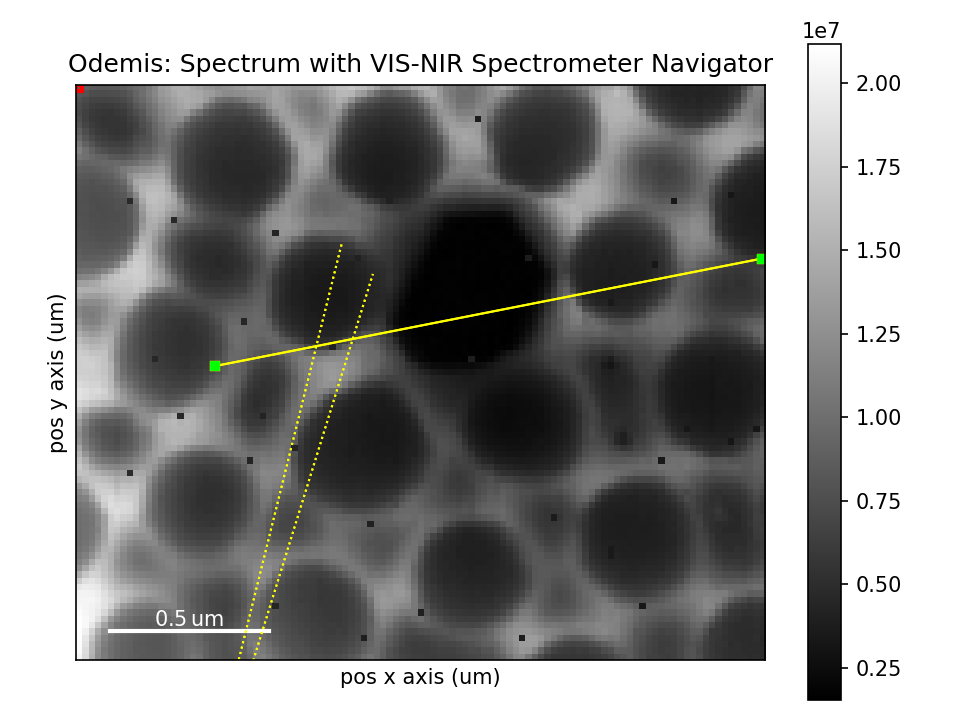

<IPython.core.display.Javascript object>


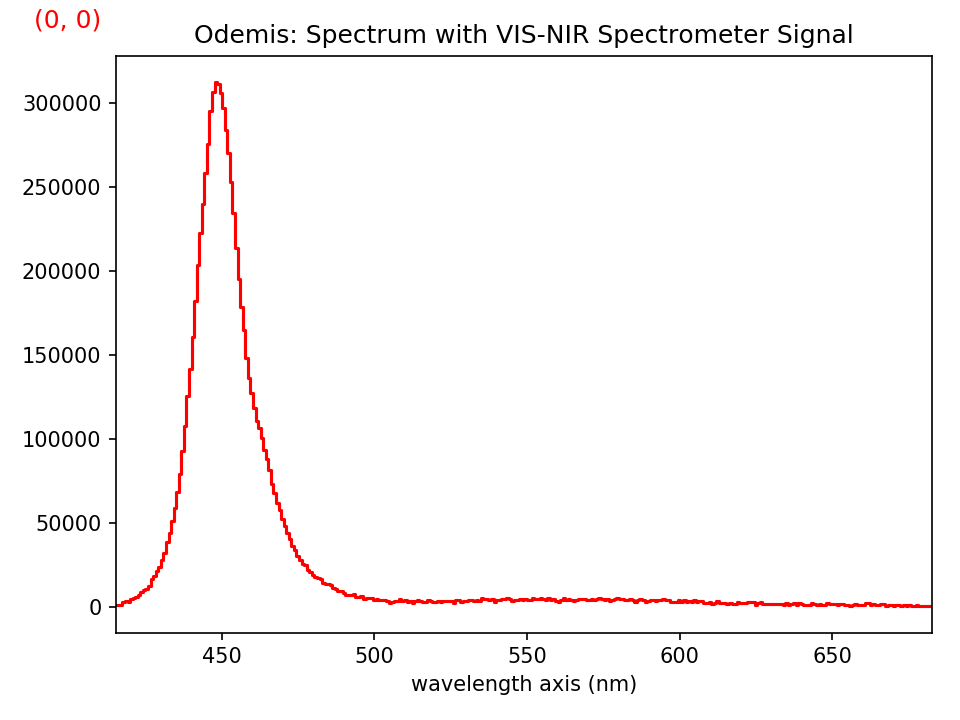

VBox(children=(HBox(children=(Label(value='pos x', layout=Layout(width='15%')), IntSlider(value=0, description='index', max=108), BoundedFloatText(value=0.0, continuous_update=True, description='value', max=2.1600000000000006, step=0.020000000000000007), Label(value='um', layout=Layout(width='5%')))), HBox(children=(Label(value='pos y', layout=Layout(width='15%')), IntSlider(value=0, description='index', max=90), BoundedFloatText(value=0.0, continuous_update=True, description='value', max=1.8000000000000007, step=0.020000000000000007), Label(value='um', layout=Layout(width='5%')))), Checkbox(value=True, description='Continous update')))

<IPython.core.display.Javascript object>


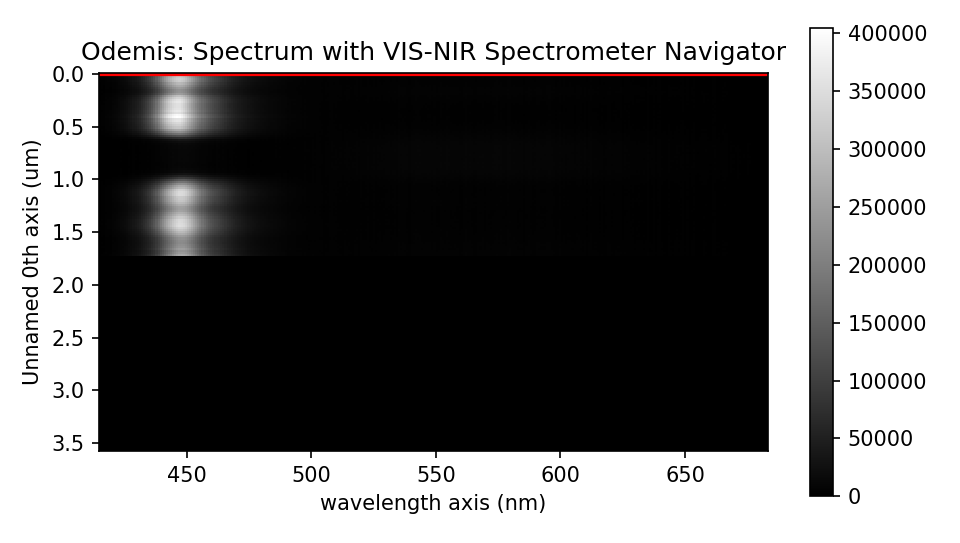

<IPython.core.display.Javascript object>


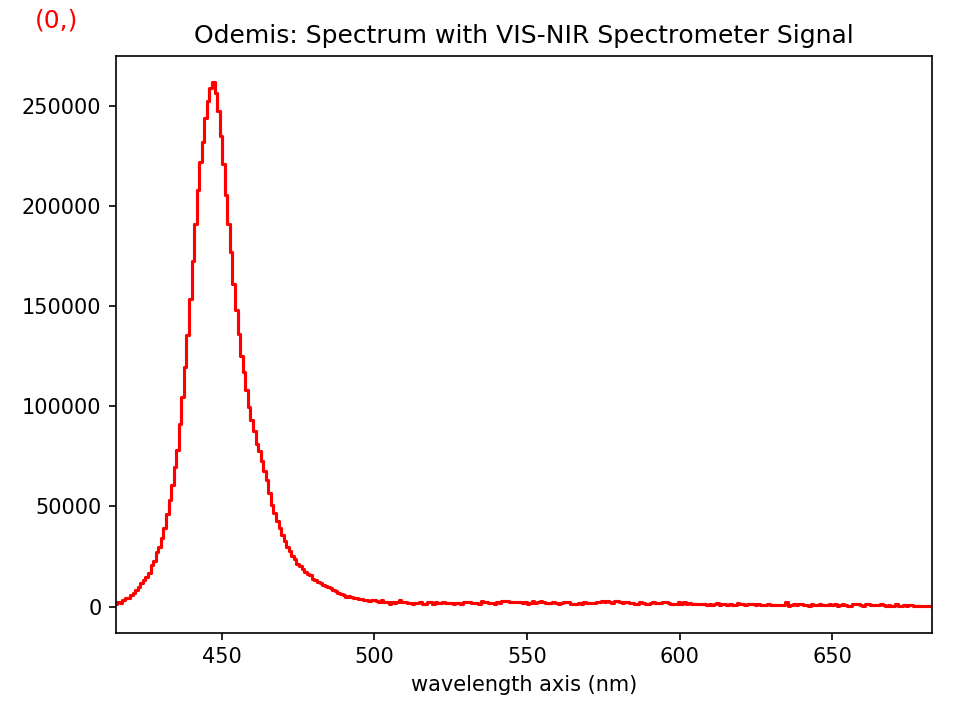

In [28]:

s = odemis_to_hyperspy('sampledata/cltest2.h5')
s = s.rebin(scale=[1,1,8]) # reduce data size

# the order of the cmds is of some importance here....
line_roi = hs.roi.Line2DROI(0.43, 0.88,4,0.54, 0.1)
line_roi.gui() # show numeric input for the cursor/roi 

s.plot()
s.axes_manager.gui_navigation_sliders()


roi1D = line_roi.interactive(s, color="yellow")
roi1D.plot()
#roi1D.axes_manager.gui_navigation_sliders()




# How to access the selected linescan data for further processing

<IPython.core.display.Javascript object>


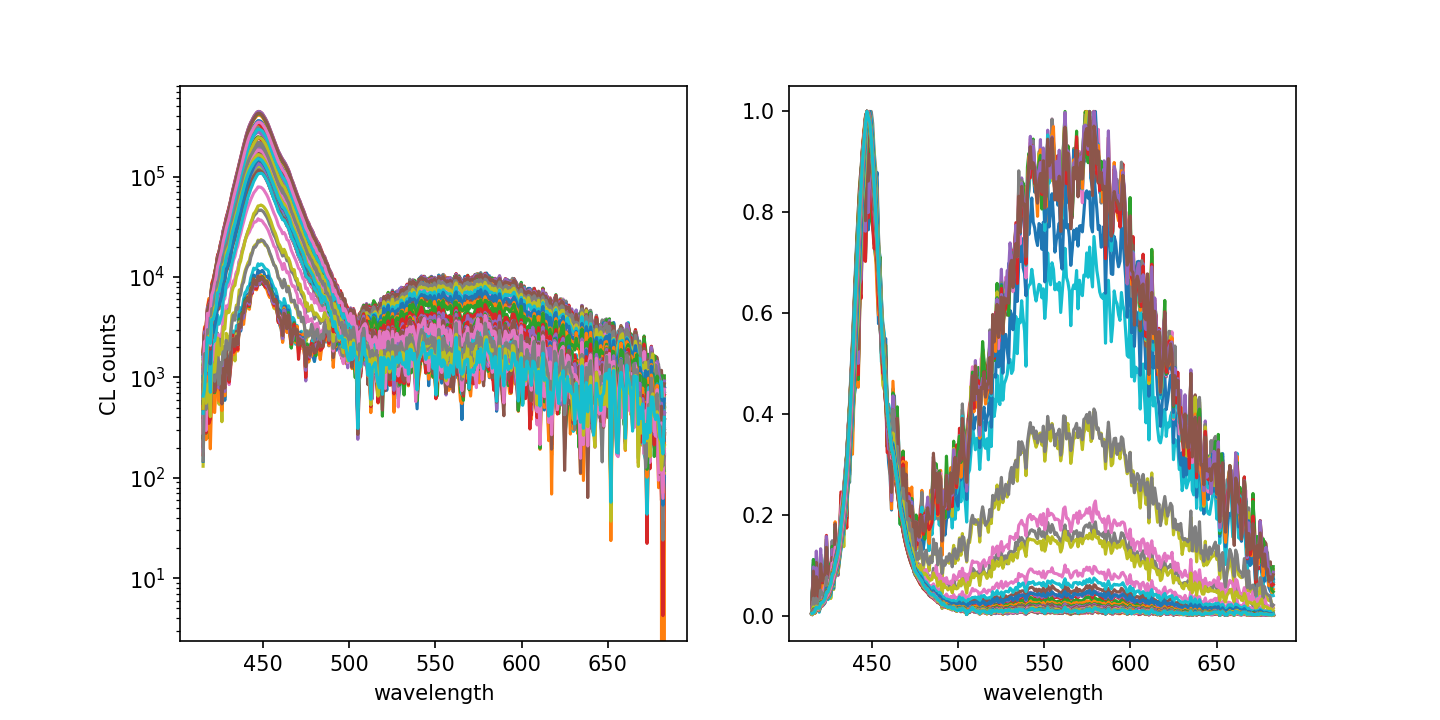

In [33]:
#access the line profile spectra directly:


yn = roi1D.data.copy()

# the 0 index is the length scale, the 1 is wavelength
xm=roi1D.axes_manager[1].scale
xo=roi1D.axes_manager[1].offset

xw = [xo+k*xm for k,x in enumerate(yn[0])]

#normalize to 1
off=np.min(yn)
for k,x in enumerate(yn) :
    yn[k] = (yn[k]-off) / np.max(yn[k]-off)


    
fig,axes = plt.subplots(ncols=2,figsize=plt.figaspect(0.5))
axes[0].plot(xw,roi1D.data.T -off)
axes[0].set_yscale('log')
axes[0].set_xlabel('wavelength')
axes[1].set_xlabel('wavelength')
axes[0].set_ylabel('CL counts')

#axes[0].set_ylim(100,1e6)

axes[1].plot(xw,yn.T)
plt.show()

fig.savefig('test.svg',dpi=600)


# linked line profiles

<sampledata/cltestpm.h5> original shape : (1, 1, 1, 728, 512)
hyperspy shape : (512, 728)
<sampledata/cltestpm.h5> original shape : (1, 1, 1, 728, 512) panchrom
hyperspy shape : (512, 728)


<IPython.core.display.Javascript object>


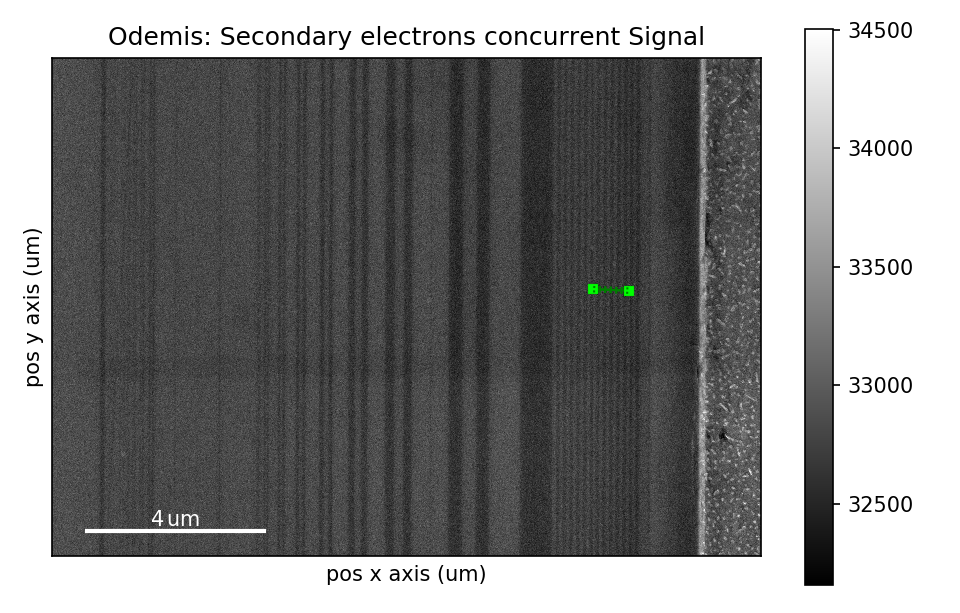

<IPython.core.display.Javascript object>


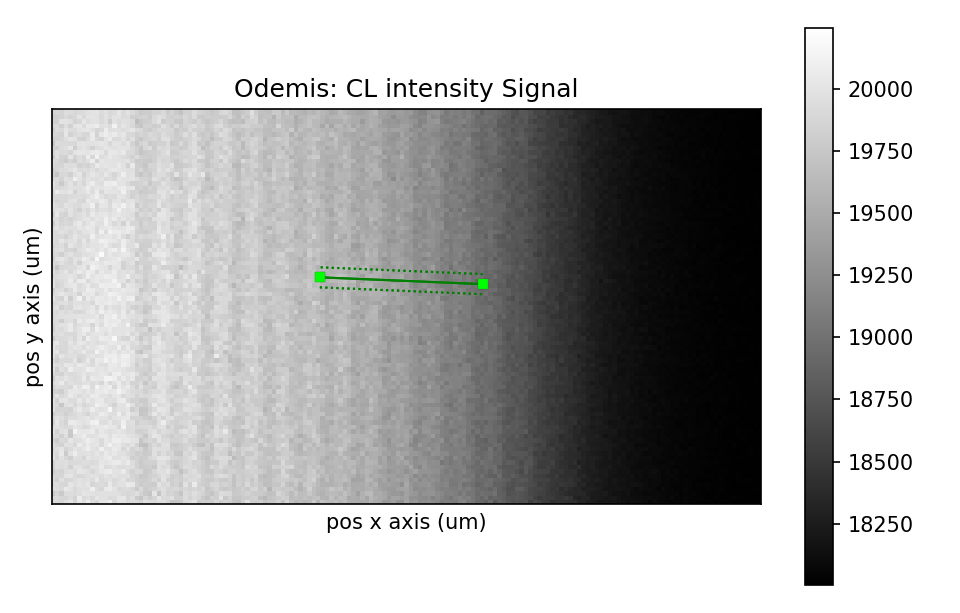

<IPython.core.display.Javascript object>


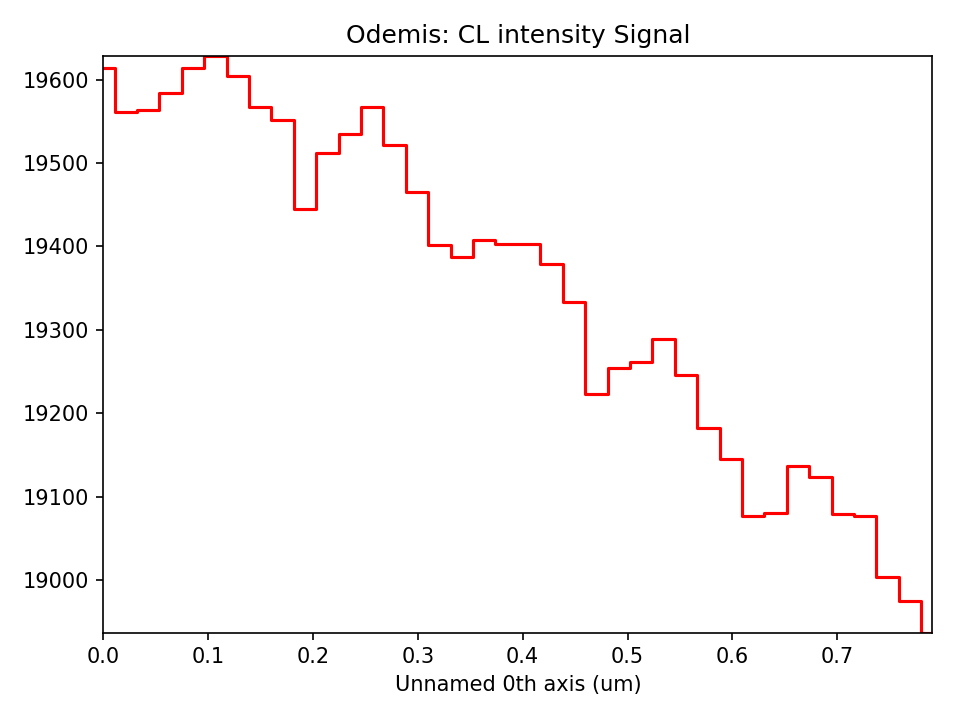

<IPython.core.display.Javascript object>


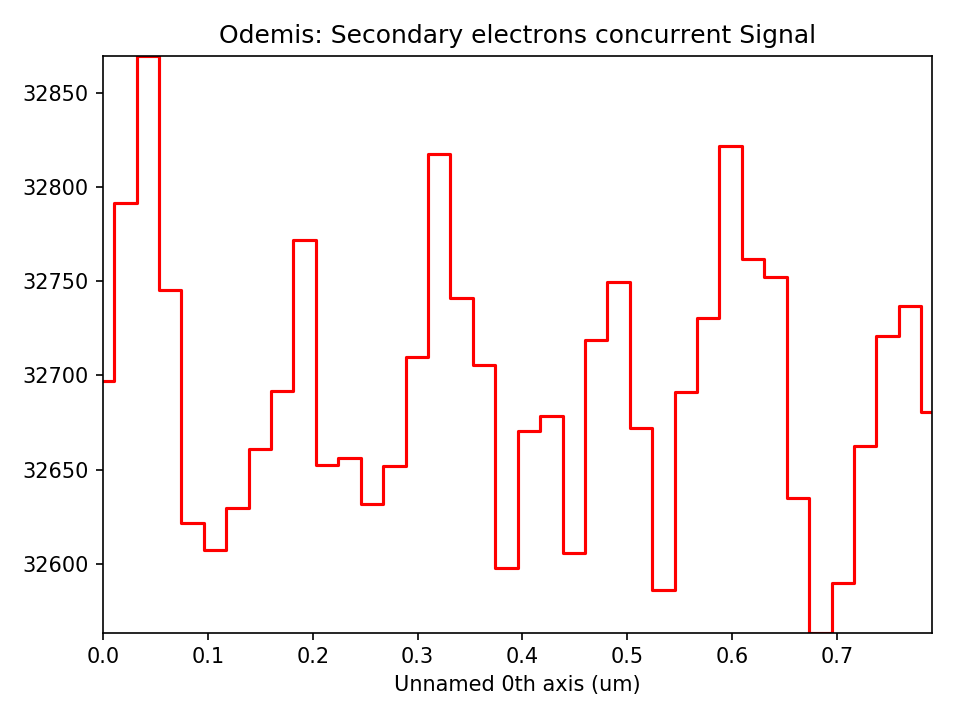

In [41]:
sem=odemisSEM_to_hyperspy('sampledata/cltestpm.h5')
cl=odemis_to_hyperspy('sampledata/cltestpm.h5')

# look at sem and cl data along the same roi line

line = hs.roi.Line2DROI(1,4,3,4,0.1)

sem.plot()
cl.plot()

# by using the same 'line' object the rois are linked
roicl = line.interactive(cl,color='green')
roisem = line.interactive(sem,color='green')


# plotting cl and sem in 1 plot doesnt seem to work interactive..
#hs.plot.plot_spectra([roisem/roisem.data.max(),roicl/roicl.data.max()])

roicl.plot()
roisem.plot()


<IPython.core.display.Javascript object>


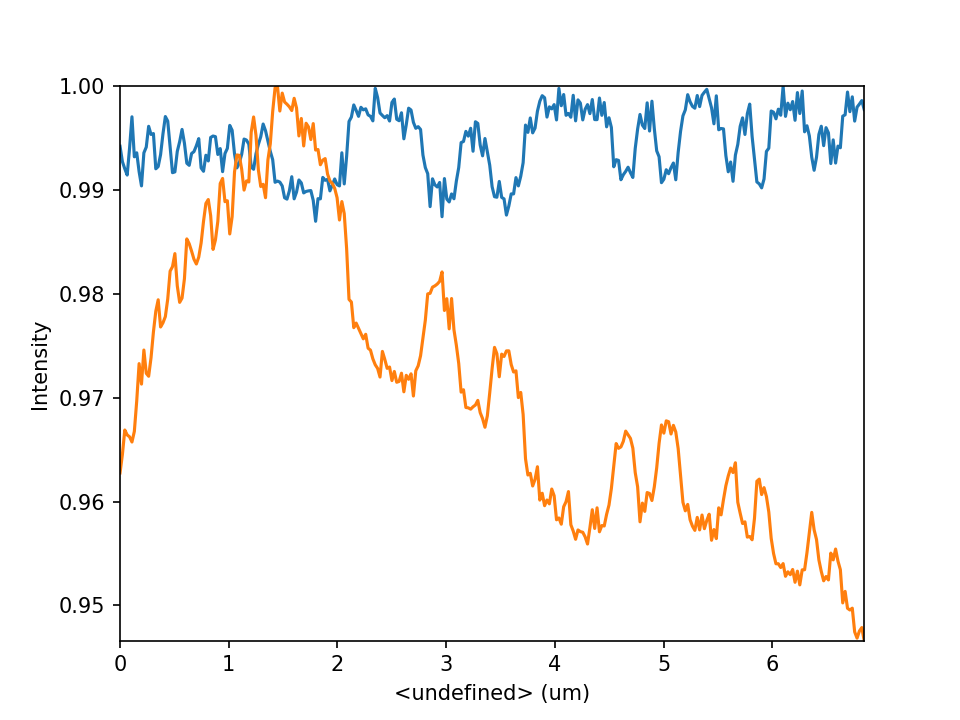

In [33]:
hs.plot.plot_spectra([roisem/roisem.data.max(),roicl/roicl.data.max()])
